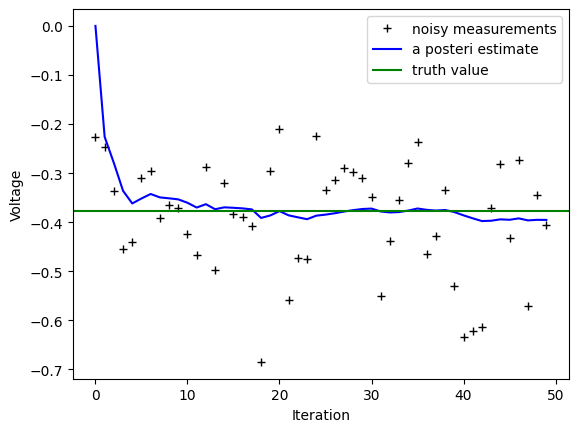

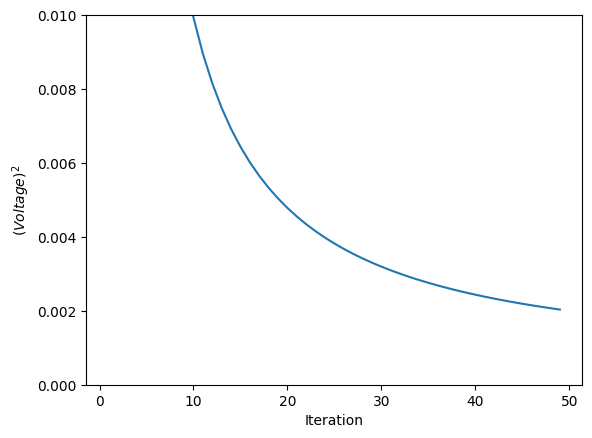

In [5]:
# -*- coding=utf-8 -*-  
  # Kalman filter example demo in Python  
     
   # A Python implementation of the example given in pages 11-15 of "An  
   # Introduction to the Kalman Filter" by Greg Welch and Gary Bishop,  
   # University of North Carolina at Chapel Hill, Department of Computer  
   # Science, TR 95-041,  
   # http://www.cs.unc.edu/~welch/kalman/kalmanIntro.html  
     
   # by Andrew D. Straw  
   #coding:utf-8  
import numpy  
import pylab  
     
   #这里是假设A=1，H=1的情况  
     
   # 参数初始化  
n_iter = 50  
sz = (n_iter,) # size of array  
x = -0.37727 # 真实值  
z = numpy.random.normal(x,0.1,size=sz) # 观测值 ,观测时存在噪声
     
Q = 1e-5 # process variance  
     
   # 分配数组空间  
xhat=numpy.zeros(sz)      # x 滤波估计值  
P=numpy.zeros(sz)         # 滤波估计协方差矩阵  
xhatminus=numpy.zeros(sz) #  x 估计值  
Pminus=numpy.zeros(sz)    # 估计协方差矩阵  
K=numpy.zeros(sz)         # 卡尔曼增益  
     
R = 0.3**2 # estimate of measurement variance, change to see effect  
     
   # intial guesses  
xhat[0] = 0.0  
P[0] = 1.0  
     
for k in range(1,n_iter):  
       # 预测  
       xhatminus[k] = xhat[k-1]  #X(k|k-1) = AX(k-1|k-1) + BU(k) + W(k),A=1,BU(k) = 0  
       Pminus[k] = P[k-1]+Q      #P(k|k-1) = AP(k-1|k-1)A' + Q(k) ,A=1  
     
       # 更新  
       K[k] = Pminus[k]/( Pminus[k]+R ) #Kg(k)=P(k|k-1)H'/[HP(k|k-1)H' + R],H=1  
       xhat[k] = xhatminus[k]+K[k]*(z[k]-xhatminus[k]) #X(k|k) = X(k|k-1) + Kg(k)[Z(k) - HX(k|k-1)], H=1  
       P[k] = (1-K[k])*Pminus[k] #P(k|k) = (1 - Kg(k)H)P(k|k-1), H=1  
   
pylab.figure()  
pylab.plot(z,'k+',label='noisy measurements')     #观测值  
pylab.plot(xhat,'b-',label='a posteri estimate')  #滤波估计值  
pylab.axhline(x,color='g',label='truth value')    #真实值  
pylab.legend()  
pylab.xlabel('Iteration')  
pylab.ylabel('Voltage')  
     
pylab.figure()  
valid_iter = range(1,n_iter) # Pminus not valid at step 0  
pylab.plot(valid_iter,Pminus[valid_iter],label='a priori error estimate')  
pylab.xlabel('Iteration')  
pylab.ylabel('$(Voltage)^2$')  
pylab.setp(pylab.gca(),'ylim',[0,.01])  
pylab.show()  


In [ ]:
from numpy import dot
from numpy import dot, sum, tile, linalg
from numpy.linalg import inv

def kf_predict(X, P, A, Q, B, U):
    X = dot(A, X) + dot(B, U)
    P = dot(A, dot(P, A.T)) + Q
    return(X,P)

def kf_update(X, P, Y, H, R):
    IM = dot(H, X)
    IS = R + dot(H, dot(P, H.T))
    K = dot(P, dot(H.T, inv(IS)))
    X = X + dot(K, (Y-IM))
    P = P - dot(K, dot(IS, K.T))
    LH = gauss_pdf(Y, IM, IS)
    return (X,P,K,IM,IS,LH)

def gauss_pdf(X, M, S):
    if M.shape()[1] == 1:
        DX = X - tile(M, X.shape()[1])
        E = 0.5 * sum(DX * (dot(inv(S), DX)), axis=0)
        E = E + 0.5 * M.shape()[0] * log(2 * pi) + 0.5 * log(det(S))
        P = exp(-E)
    elif X.shape()[1] == 1:
        DX = tile(X, M.shape()[1])- M
        E = 0.5 * sum(DX * (dot(inv(S), DX)), axis=0)
        E = E + 0.5 * M.shape()[0] * log(2 * pi) + 0.5 * log(det(S))
        P = exp(-E)
    else:
        DX = X-M
        E = 0.5 * dot(DX.T, dot(inv(S), DX))
        E = E + 0.5 * M.shape()[0] * log(2 * pi) + 0.5 * log(det(S))
        P = exp(-E)
    return (P[0],E[0])